### GRDC DATA ANALYSIS

This dataset includes water discharge (river flow) from GRDC for a couple stations with +20 years of daily data each. This notebook will analyses the data and to find features of the data, and what the seasonality of each station looks like

In [39]:
import os

# File path to the data
file_path = "/Users/misanmeggison/Desktop/GRDC_myanmar"

# List all files in the directory
file_list = os.listdir(file_path)

# Function to read and clean data from the text files
def read_data(file_path, file_list):
    grdc_data = dict()  # Dictionary to store cleaned data

    for file in file_list:
        file_name = os.path.splitext(file)[0]  # Get the file name without extension
        file_dir = os.path.join(file_path, file)
        
        # Check if the file ends with '.txt'
        if file_dir.endswith('.txt'):
            with open(file_dir, 'r') as file:
                data = file.readlines()  # Read all lines from the file
                cleaned_data = []
                
                # Iterate over each line in the file
                for line in data:
                    # Split the line by semicolon
                    parts = line.split(';')
                    
                    if len(parts) >= 3:  # Ensure the line has at least 3 parts (date, time, value)
                        date = parts[0].strip()  # Extract date
                        value_str = parts[2].strip()  # Extract value (after the last semicolon)
                        
                        # Convert value to a float (strip to remove extra spaces)
                        try:
                            value_float = float(value_str)
                        except ValueError:
                            value_float = None  # Handle cases where the value is not a valid float
                        
                        if date and value_float is not None:
                            cleaned_data.append((date, value_float))  # Append as tuple
                    else:
                        # Debugging: print lines that don't match expected format
                        print(f"Skipping invalid line in {file_name}: {line}")

                # Add the cleaned data to the dictionary under the file's name
                grdc_data[file_name] = cleaned_data

    return grdc_data

# Call the function to process the data
grdc_data = read_data(file_path, file_list)

# Output the cleaned data (for verification)
for key, value in grdc_data.items():
    print(f"{key}: {value[:5]}")  # Print the first 5 entries for each file


magway: [('1996-01-01', 3674.0), ('1996-01-02', 3603.0), ('1996-01-03', 3585.0), ('1996-01-04', 3543.0), ('1996-01-05', 3497.0)]
pyay: [('1996-01-01', 4113.0), ('1996-01-02', 4066.0), ('1996-01-03', 4020.0), ('1996-01-04', 4024.0), ('1996-01-05', 3946.0)]
mawlaik: [('1996-01-01', 1008.0), ('1996-01-02', 988.0), ('1996-01-03', 974.0), ('1996-01-04', 954.0), ('1996-01-05', 945.0)]
sagaing: [('1978-01-01', 2590.0), ('1978-01-02', 2576.0), ('1978-01-03', 2520.0), ('1978-01-04', 2604.0), ('1978-01-05', 2699.0)]
monywa: [('1996-01-01', 914.0), ('1996-01-02', 905.0), ('1996-01-03', 887.0), ('1996-01-04', 870.0), ('1996-01-05', 860.0)]
hkamti: [('1978-01-01', 334.0), ('1978-01-02', 324.0), ('1978-01-03', 320.0), ('1978-01-04', 305.0), ('1978-01-05', 296.0)]
katha: [('1996-01-01', 1173.0), ('1996-01-02', 1149.0), ('1996-01-03', 1133.0), ('1996-01-04', 1111.0), ('1996-01-05', 1080.0)]


In [41]:
import pandas as pd

df_list = []
for key, value in grdc_data.items():
    # Convert each region's data to a DataFrame
    region_df = pd.DataFrame(value, columns=['Date', key])
    region_df['Date'] = pd.to_datetime(region_df['Date'])  # Convert 'Date' to datetime format
    df_list.append(region_df)

In [42]:
# Merge all region dataframes on the 'Date' column
df = df_list[0]  # Start with the first DataFrame
for region_df in df_list[1:]:
    df = pd.merge(df, region_df, on='Date', how='outer')

In [43]:
df.head(10)

,Date,magway,pyay,mawlaik,sagaing,monywa,hkamti,katha
0,1978-01-01,NaN,NaN,NaN,2590.0,NaN,334.0,NaN
1,1978-01-02,NaN,NaN,NaN,2576.0,NaN,324.0,NaN
2,1978-01-03,NaN,NaN,NaN,2520.0,NaN,320.0,NaN
3,1978-01-04,NaN,NaN,NaN,2604.0,NaN,305.0,NaN
4,1978-01-05,NaN,NaN,NaN,2699.0,NaN,296.0,NaN
5,1978-01-06,NaN,NaN,NaN,2834.0,NaN,292.0,NaN
6,1978-01-07,NaN,NaN,NaN,2751.0,NaN,288.0,NaN
7,1978-01-08,NaN,NaN,NaN,2632.0,NaN,276.0,NaN
8,1978-01-09,NaN,NaN,NaN,2604.0,NaN,268.0,NaN
9,1978-01-10,NaN,NaN,NaN,2576.0,NaN,264.0,NaN


In [51]:
# find the date range
date_range = (df['Date'].min(), df['Date'].max())

print(f"Date range: {date_range}")

Date range: (Timestamp('1978-01-01 00:00:00'), Timestamp('2023-12-31 00:00:00'))


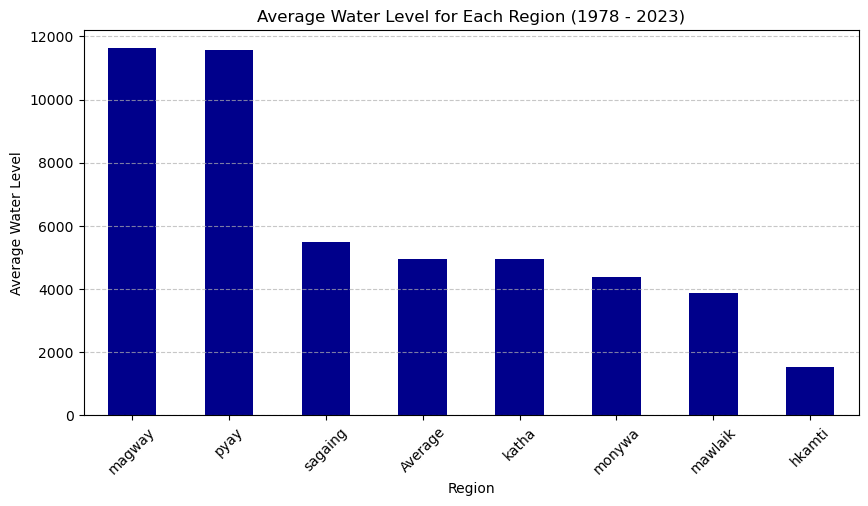

In [54]:
# Plot average water level for each region
import matplotlib.pyplot as plt

# calculate the average water level for each region column excluding non numeric values
average_list = df.mean(numeric_only=True).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
average_list.plot(kind='bar', color='darkblue')

plt.title('Average Water Level for Each Region (1978 - 2023)')
plt.xlabel('Region')
plt.ylabel('Average Water Level')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<Figure size 1200x600 with 0 Axes>

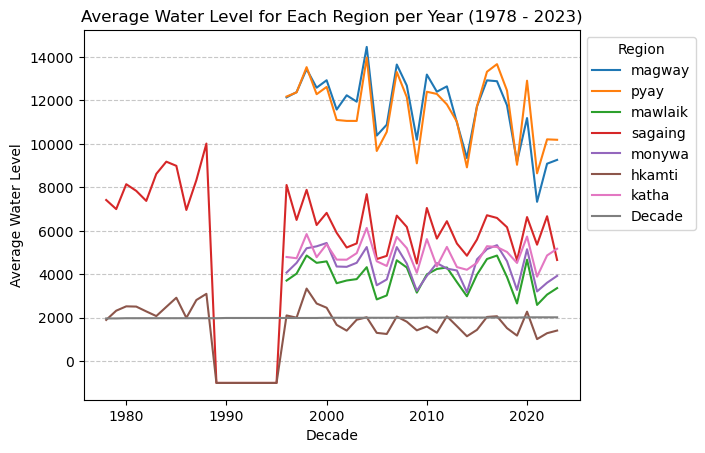

In [66]:
# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Group by 'Decade' and calculate the average water level for each region
decade_avg = df.groupby('Year').mean(numeric_only=True)
decade_avg.drop(columns=['Average'], inplace=True)  # Drop the 'Year' column

# Plot the average water level for each region per decade
plt.figure(figsize=(12, 6))
decade_avg.plot()

plt.title('Average Water Level for Each Region per Year (1978 - 2023)')
plt.xlabel('Decade')
plt.ylabel('Average Water Level')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Region', bbox_to_anchor=(1, 1))
plt.show()

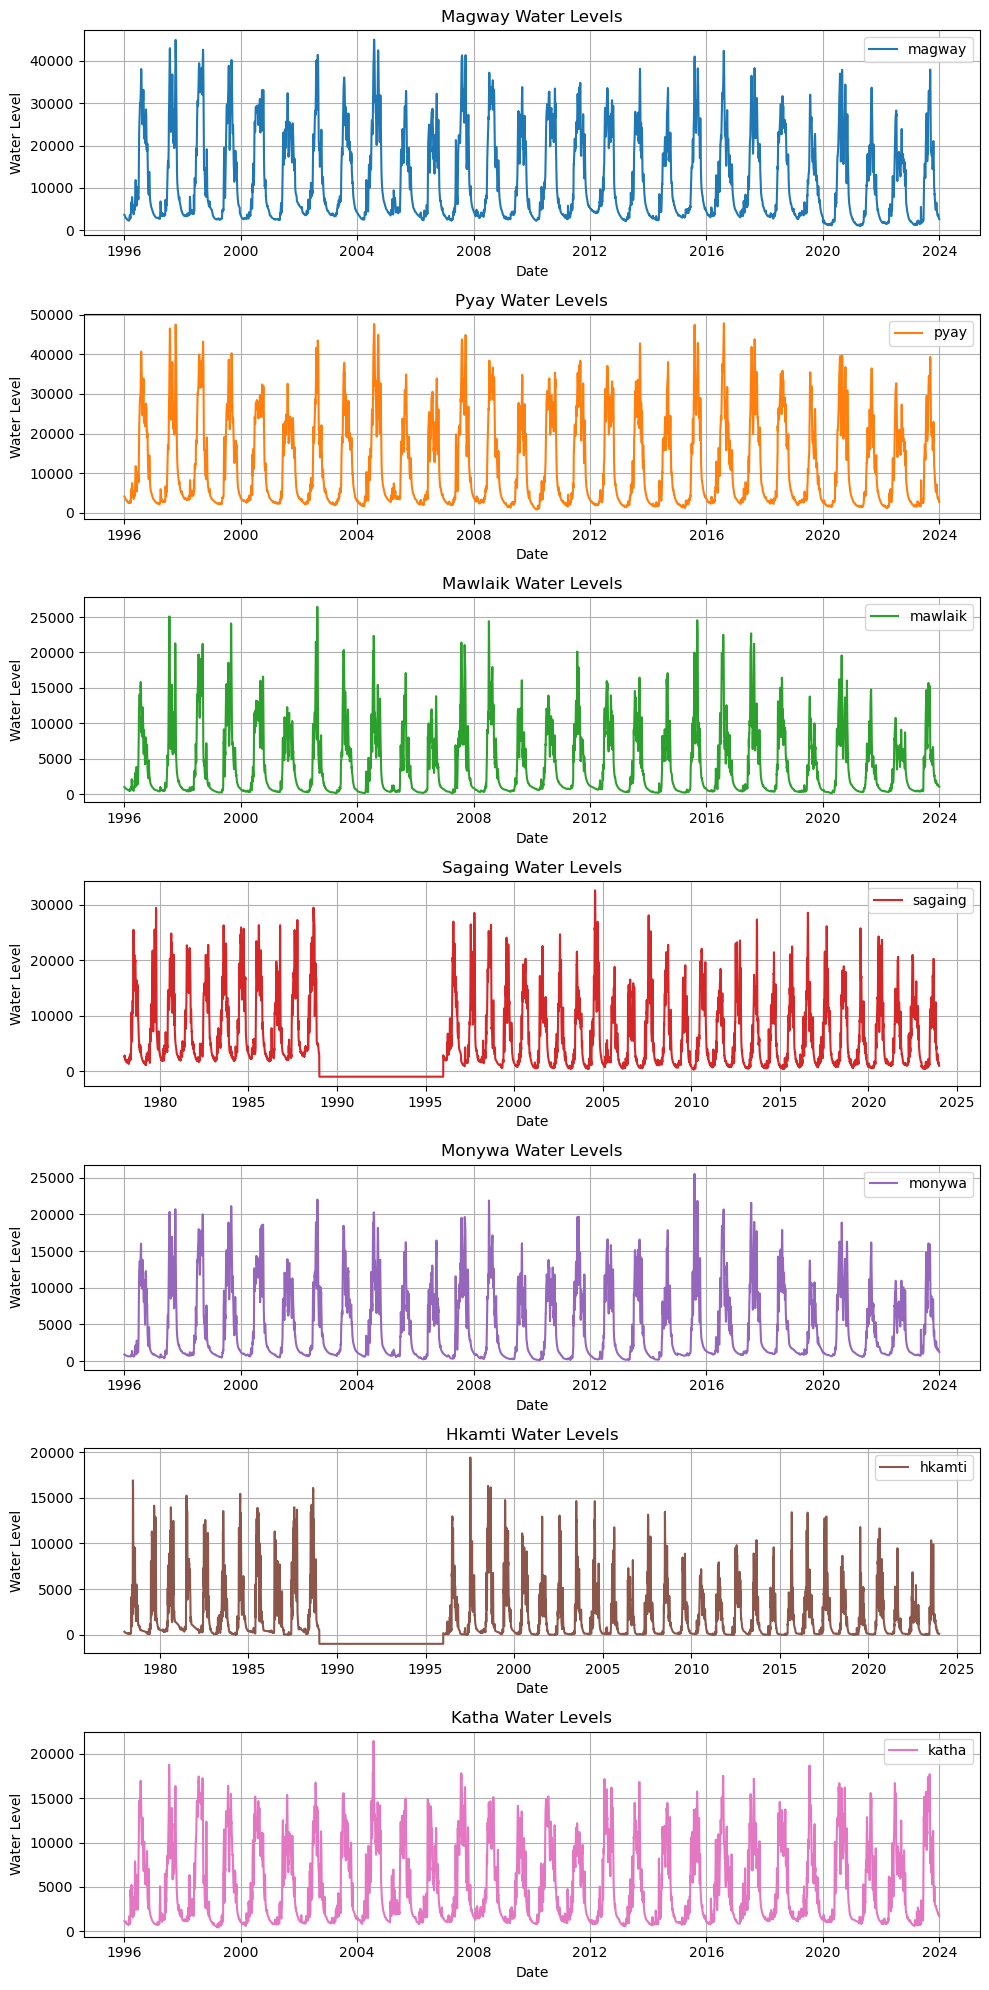

In [26]:
# Step 2: Plot all the areas in subplots
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

regions = list(grdc_data.keys())
num_regions = len(regions)

fig, axes = plt.subplots(nrows=num_regions, ncols=1, figsize=(10, 20))  # Create subplots

for i, region in enumerate(regions):
    axes[i].plot(df['Date'], df[region], label=region, color=f'C{i}')  # Color by index C0, C1, C2, etc.
    axes[i].set_title(f'{region.capitalize()} Water Levels')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Water Level')
    axes[i].legend()
    axes[i].grid(True)

# Adjust layout
plt.tight_layout()

# Show the multi-plot figure
plt.show()

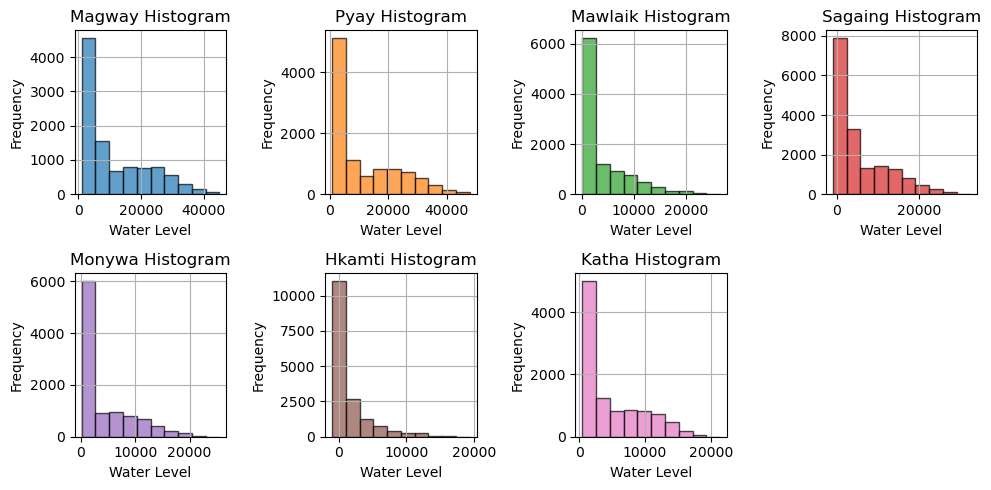

In [67]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 5))  # Create 2x4 subplots (since we have 7 regions, we'll use one subplot space empty)
axes = axes.flatten()

regions = list(grdc_data.keys())

for i, region in enumerate(regions):
    axes[i].hist(df[region], bins=10, color=f'C{i}', alpha=0.7, edgecolor='black')
    axes[i].set_title(f'{region.capitalize()} Histogram')
    axes[i].set_xlabel('Water Level')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Hide the last subplot if unused
axes[-1].axis('off')

# Adjust layout
plt.tight_layout()

# Show histogram plot
plt.show()

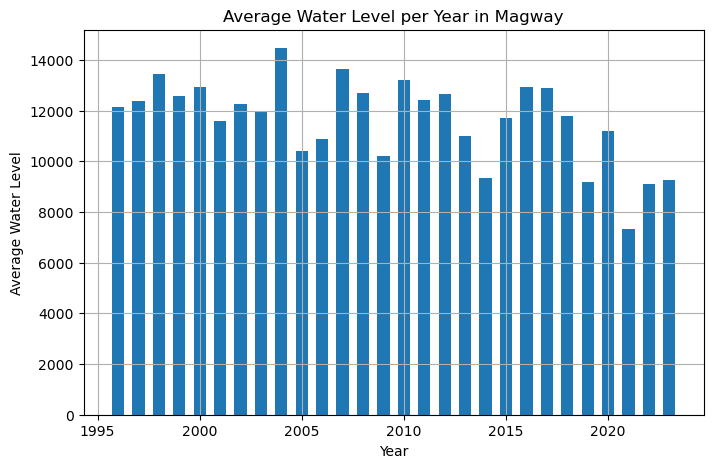

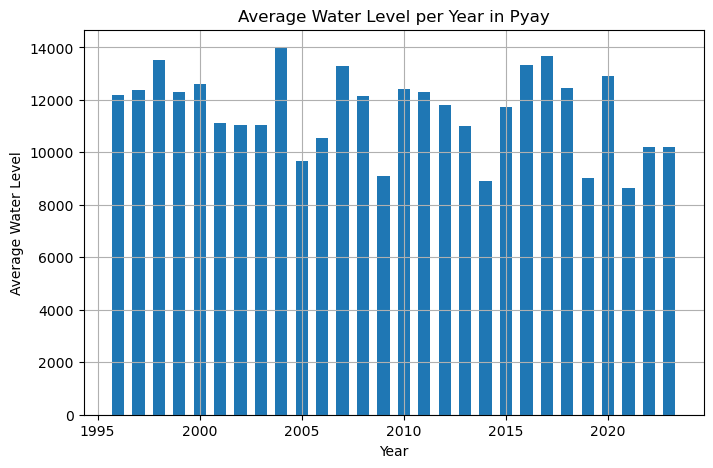

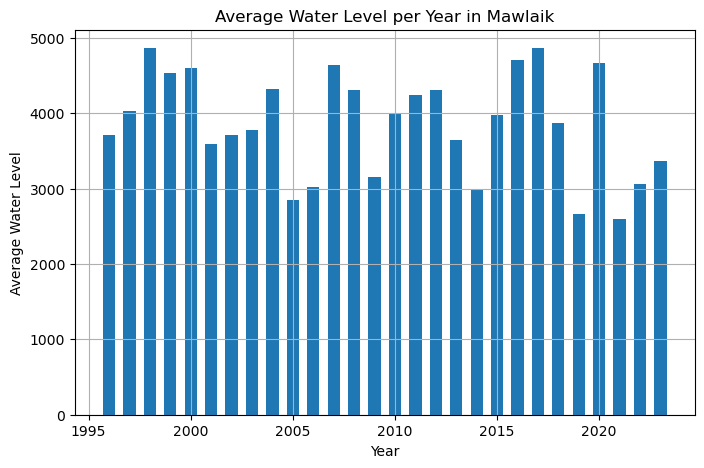

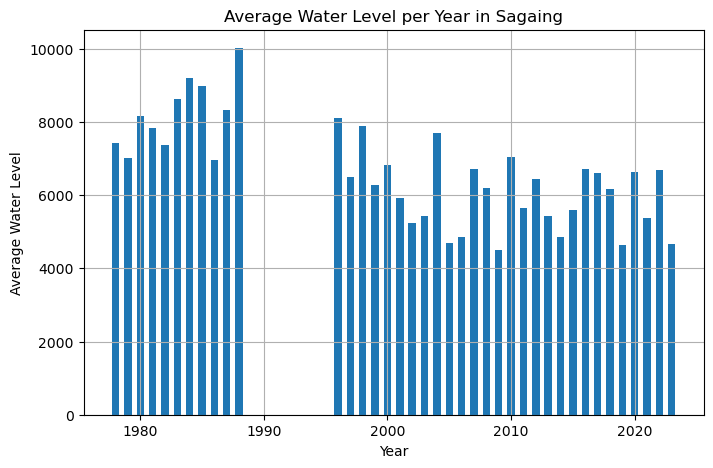

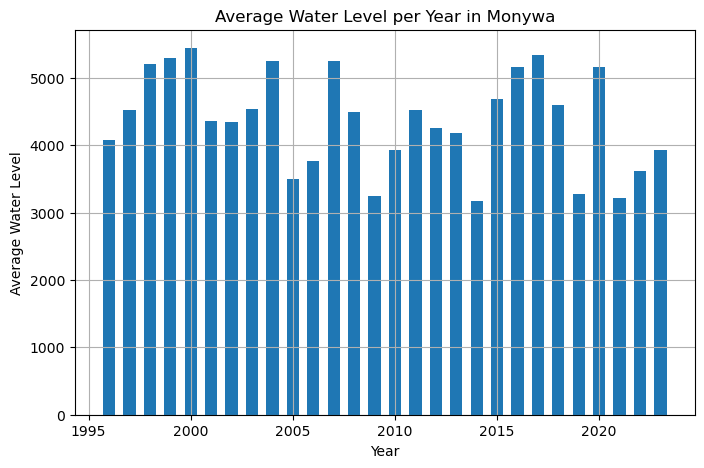

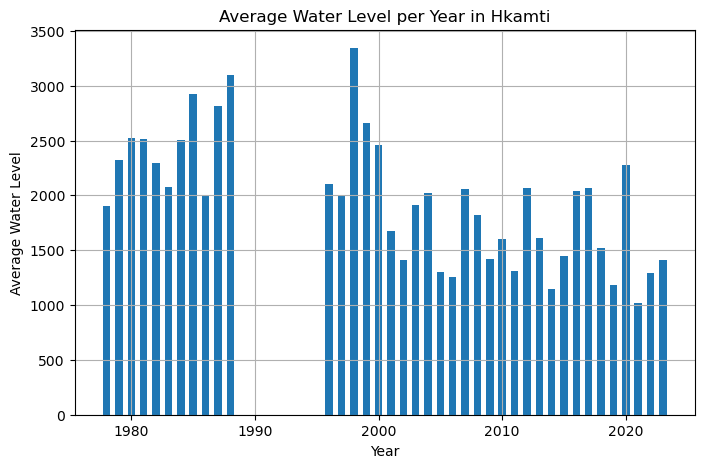

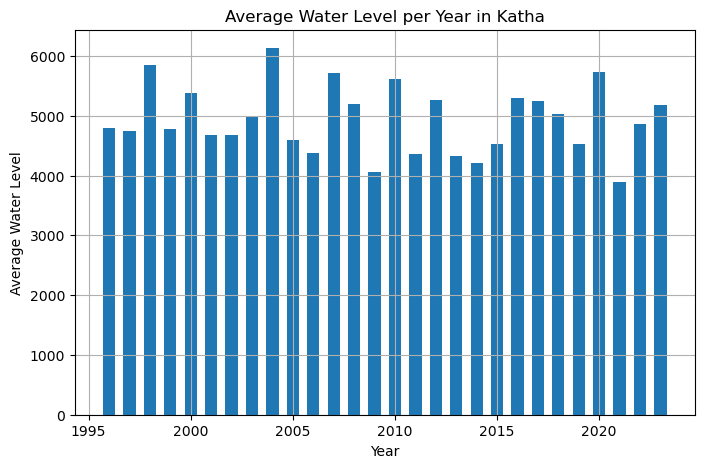

In [68]:
df['Year'] = df['Date'].dt.year

# Plot average water level per year for each region
regions = list(grdc_data.keys())

# Loop through each region and create a bar chart
for region in regions:
    # Replace negative values with zero
    df[region] = df[region].clip(lower=0)
    
    # Calculate the average water level per year for the current region
    avg_water_per_year = df.groupby('Year')[region].mean().reset_index()

    # Plotting the bar chart for this region's average water levels
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(avg_water_per_year['Year'], avg_water_per_year[region], color='C0', width=0.6)

    ax.set_xlabel('Year')
    ax.set_ylabel('Average Water Level')
    ax.set_title(f'Average Water Level per Year in {region.capitalize()}')
    ax.grid(True)

    # Show the bar chart for this region
    plt.show()


In [31]:
# export data to csv
df.to_csv('grdc_data.csv', index=False)

Summary of Findings:

1. Time Series Plots for Each Region:
Objective: To visualize how the water levels have fluctuated over time in each region.
Regions Analyzed: Magway, Pyay, Mawlaik, Sagaing, Monywa, Hkamti, and Katha.
Insights:
The regions show varied trends in water levels across different time periods.
For some regions (e.g., Sagaing, Hkamti), water levels appear to fluctuate significantly, while others remain more stable over time.
Missing data points are present in some regions, which explain gaps in the plots.


2. Histograms of Water Levels for Each Region:
Objective: To understand the distribution of water levels within each region.
Insights:
Each region has a different distribution of water levels.
Regions like Sagaing and Monywa show a wider distribution, indicating more variability in water levels, while regions like Hkamti have a more constrained range.
For some regions, most water levels are concentrated within specific intervals, while others show more spread-out distributions.


3. Bar Chart of Average Water Levels Per Year:
Objective: To visualize the average water level per year across all regions.
Insights:
The chart shows yearly variations in water levels across all regions.


General Observations:
The data contains missing values, which could impact the accuracy of the analysis.
Negative water levels were handled by converting them to zero, as they likely represent erroneous or missing data.
The regions vary significantly in water level trends, distributions, and averages, indicating diverse hydrological characteristics.
The regions vary significantly in water level trends, distributions, and averages, indicating diverse hydrological characteristics.



Note: Negative water levels were handled by converting them to zero, as they likely represent erroneous or missing data.
